In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal


In [2]:
%matplotlib inline
#sns.set()
#%matplotlib nbagg

pd.options.display.precision = 15

# Load Data

In [3]:
failure_datapath = '''D:/jupyter-notebooks/LANL_Earthquake_Prediction/failure/'''
train_data_path = '''C:/studium/studium/CAS_PML/Projekt_Arbeit/earthquake/Daten/all/train.csv'''

In [4]:
#load second earthquake
failure = pd.DataFrame(np.load(failure_datapath+'/failure{}.npy'.format(1)))
failure.columns = ['acoustic_data','time_to_failure']

# Preperation

For more background on applications of spectrograms to machine learning, see Haytham Fayek's (https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html) post.

## Low-pass (noise-reducing) filter

In [5]:
#The scipy.signal.decimate function applies a low-pass (noise-reducing) filter, and samples the data every n-th value based on the downsample rate
dsamprate = 4
x = signal.decimate(failure.acoustic_data.iloc[len(failure.acoustic_data)-150000:len(failure.acoustic_data)], dsamprate)

## Parameter

In [6]:
data = x
nperseg = 256 # default 256
noverlap = nperseg // 8 # default: nperseg // 8
fs = 4000000 // dsamprate # raw signal sample rate 4MHz
window = 'hamming'
scaling = 'density' # {'density', 'spectrum'}
detrend = 'linear' # {'linear', 'constant', False}

# Calculate spectrogramm

In [7]:
f, t, Sxx = signal.spectrogram(data, nperseg=nperseg, noverlap=noverlap,
                                   fs=fs, window=window,
                                   scaling=scaling, detrend=detrend)

In [115]:
Sxx.shape
#frequenz , 

(129, 167)

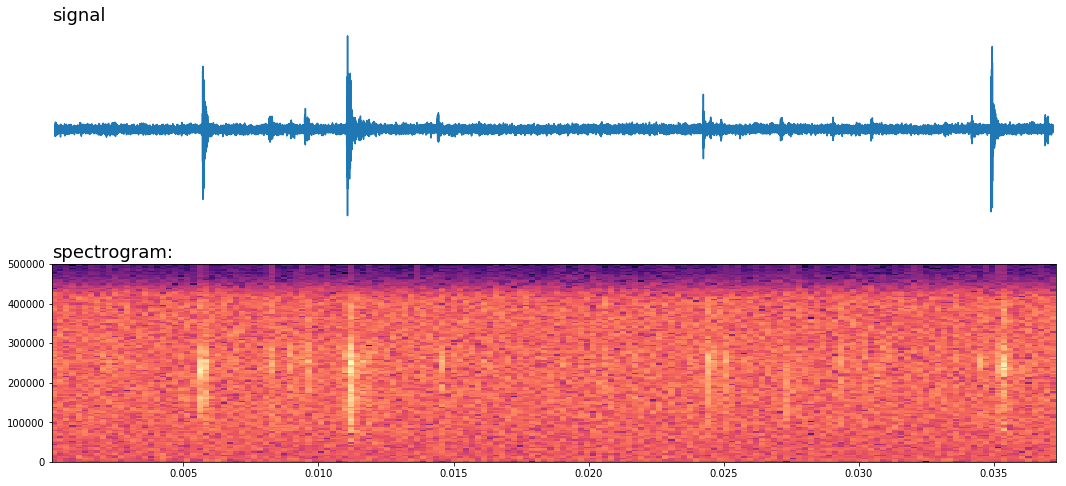

In [12]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(2, 1, 1)
ax.margins(x=0.003)
plt.plot(data)
plt.title('signal', fontsize=18, loc='left')
plt.axis('off')

ax = fig.add_subplot(2, 1, 2)
cmap = plt.get_cmap('magma')
spec = plt.pcolormesh(t, f, np.log(Sxx), cmap=cmap)
plt.title('spectrogram:',
          fontsize=18, loc='left')
plt.show()

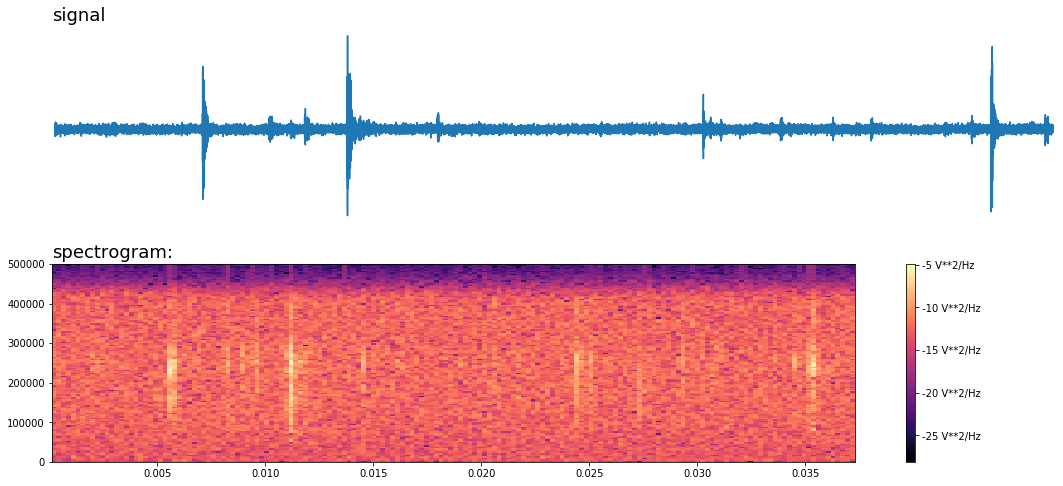

In [11]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(2, 1, 1)
ax.margins(x=0.003)
plt.plot(data)
plt.title('signal', fontsize=18, loc='left')
plt.axis('off')

ax = fig.add_subplot(2, 1, 2)
cmap = plt.get_cmap('magma')
spec = plt.pcolormesh(t, f, np.log(Sxx), cmap=cmap)
plt.title('spectrogram:',
          fontsize=18, loc='left')
plt.colorbar(format='%+2.0f V**2/Hz')
plt.show()

# Save image

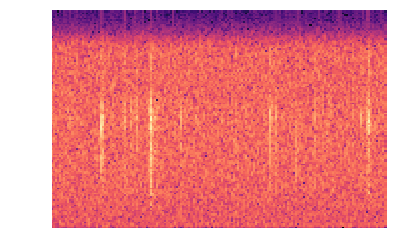

In [121]:
cmap = plt.get_cmap('magma')
plt.axis('off')
spec = plt.pcolormesh(t, f, np.log(Sxx), cmap=cmap)
plt.savefig('test.png')